***Sam Cressman Capstone Project: Shelter Animal Outcomes***

***Help improve outcomes for shelter animals***

***Capstone inspiration:*** [Kaggle](https://www.kaggle.com/c/shelter-animal-outcomes)

***Graphing Notebook***

# IN PROGRESS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
animals_graphing = pd.read_csv("../CSVs/cleaned_animals_pre_numeric_pre_dummies.csv")

In [3]:
# Quick check

animals_graphing.head();

In [4]:
# Changing back to DateTimes

animals_graphing["Intake Time"] = pd.to_datetime(animals_graphing["Intake Time"]).dt.date
animals_graphing["Outcome Time"] = pd.to_datetime(animals_graphing["Outcome Time"]).dt.date
animals_graphing["Date of Birth"] = pd.to_datetime(animals_graphing["Date of Birth"]).dt.date

***Outcome Type***

In [5]:
# Dog, cat, other, bird, livestock

animals_graphing["Animal Type"].unique();

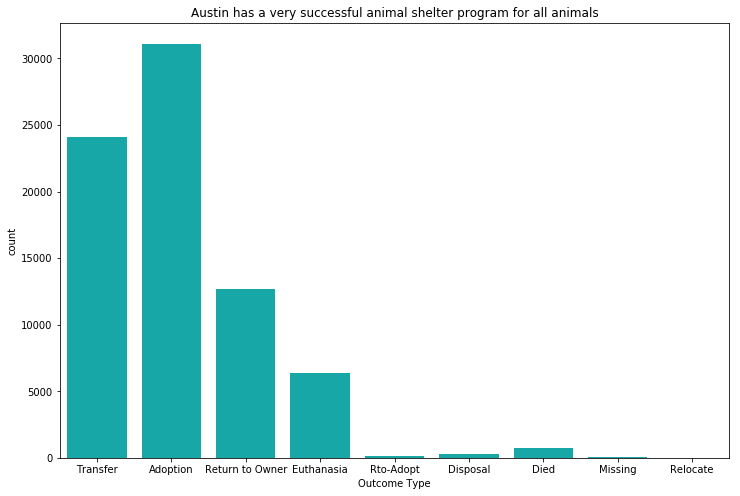

In [6]:
# Examining Outcome Type

plt.figure(figsize = (12, 8))
plt.title("Austin has a very successful animal shelter program for all animals")

sns.countplot(x = "Outcome Type", data = animals_graphing, color = "c")

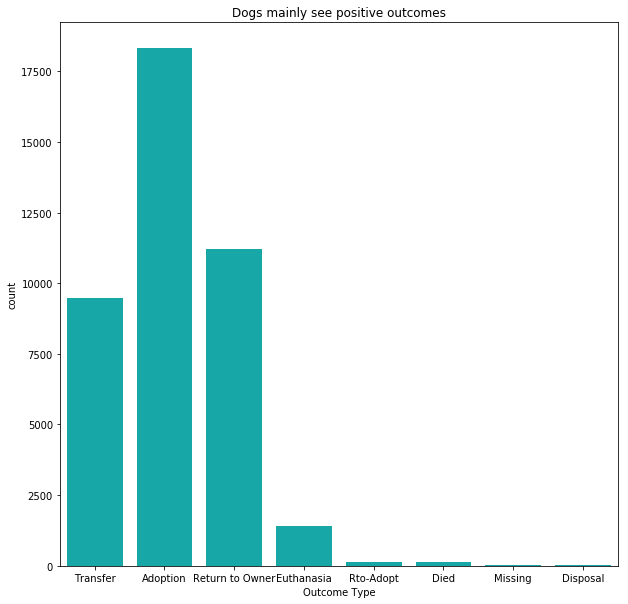

In [7]:
# Plotting dog outcomes: mainly positive

mask = animals_graphing[animals_graphing["Animal Type"] == "Dog"]

plt.figure(figsize = (10, 10))
plt.title("Dogs mainly see positive outcomes")

sns.countplot(x = "Outcome Type", data = mask, color = "c")

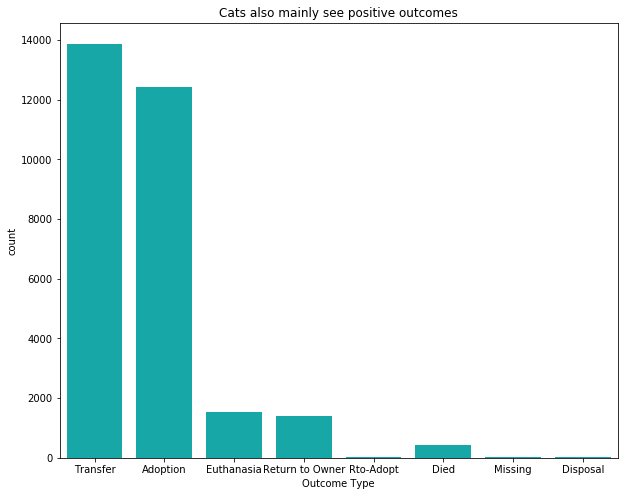

In [8]:
# Plotting cat outcomes: mainly positive

mask = animals_graphing[animals_graphing["Animal Type"] == "Cat"]

plt.figure(figsize = (10, 8))
plt.title("Cats also mainly see positive outcomes")

sns.countplot(x = "Outcome Type", data = mask, hue_order = True, color = "c")

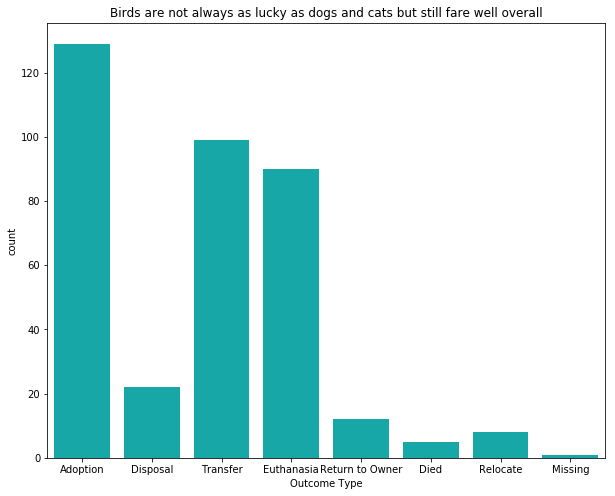

In [9]:
# Bird outcomes: still mainly positive

mask = animals_graphing[animals_graphing["Animal Type"] == "Bird"]

plt.figure(figsize = (10, 8))
plt.title("Birds are not always as lucky as dogs and cats but still fare well overall")

sns.countplot(x = "Outcome Type", data = mask, color = "c")

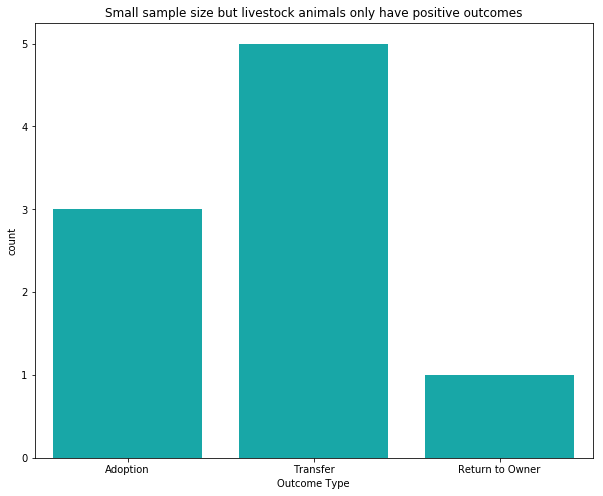

In [10]:
# Livestock: all positive outcomes

mask = animals_graphing[animals_graphing["Animal Type"] == "Livestock"]

plt.figure(figsize = (10, 8))
plt.title("Small sample size but livestock animals only have positive outcomes")

sns.countplot(x = "Outcome Type", data = mask, color = "c")

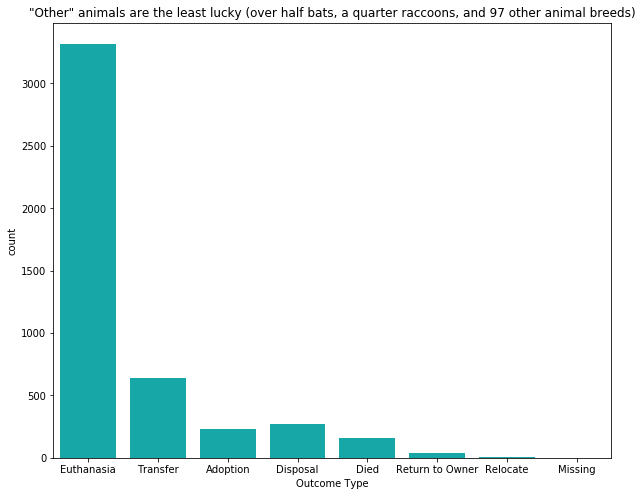

In [11]:
# Other: rarely successful

mask = animals_graphing[animals_graphing["Animal Type"] == "Other"]

plt.figure(figsize = (10, 8))
plt.title('"Other" animals are the least lucky (over half bats, a quarter raccoons, and 97 other animal breeds)')

sns.countplot(x = "Outcome Type", data = mask, color = "c")

***Outcome subtype***

In [12]:
# Half null

animals_graphing["Outcome Subtype"].isnull().sum();

In [13]:
animals_graphing["Outcome Subtype"].value_counts();

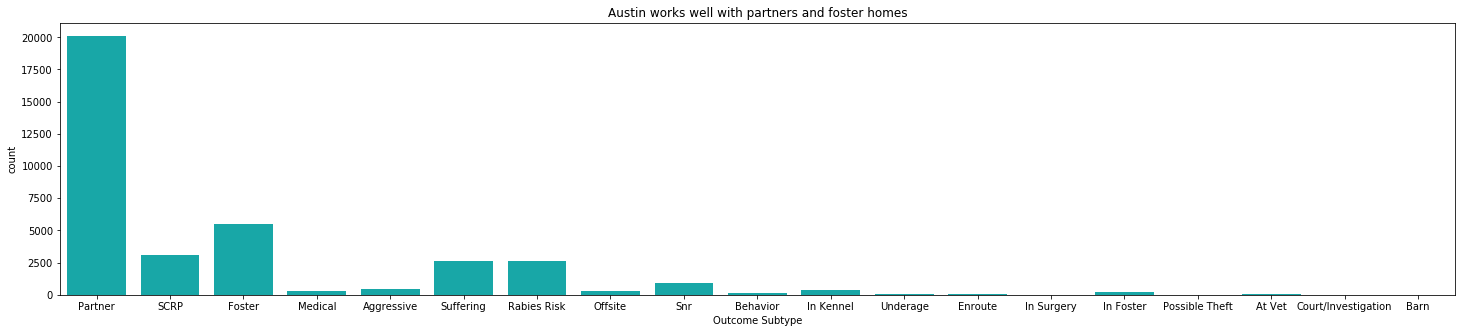

In [14]:
# Examing Outcome subtype: majority of animals are given to a partner or find a foster home

# SCRP: Austin’s Stray Cat Return Program

plt.figure(figsize=(25, 5))
plt.title("Austin works well with partners and foster homes")
sns.countplot(x = "Outcome Subtype", data = animals_graphing, color = "c")

***Intake Type vs. Outcome Type***

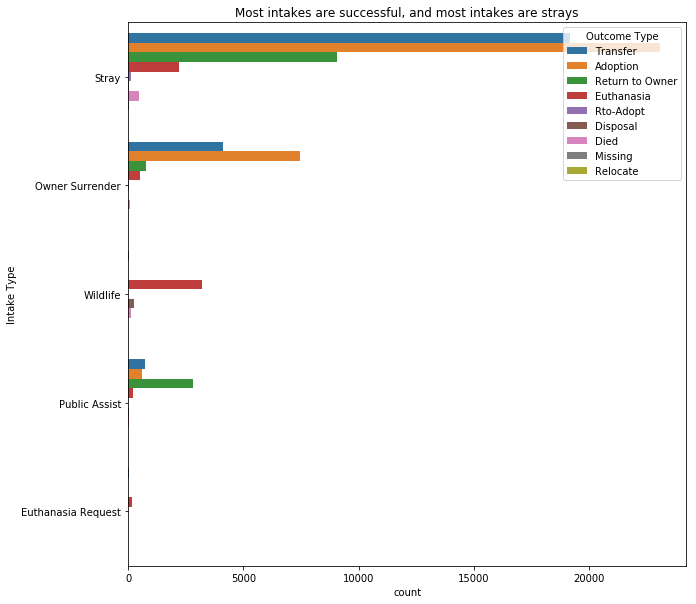

In [15]:
plt.figure(figsize=(10, 10))
plt.title("Most intakes are successful, and most intakes are strays")
sns.countplot(y = "Intake Type", data = animals_graphing, hue = "Outcome Type")

***Name***

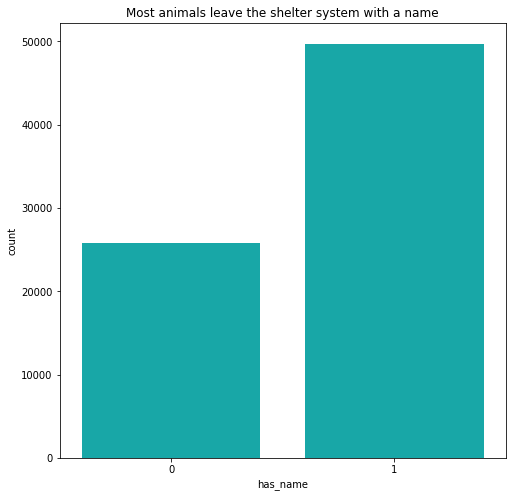

In [16]:
# Most animals do not enter the shelter system with a name, and many are not given a name even upon outcome

plt.figure(figsize=(8, 8))
plt.title("Most animals leave the shelter system with a name")
sns.countplot(x = "has_name", data = animals_graphing, color = "c")

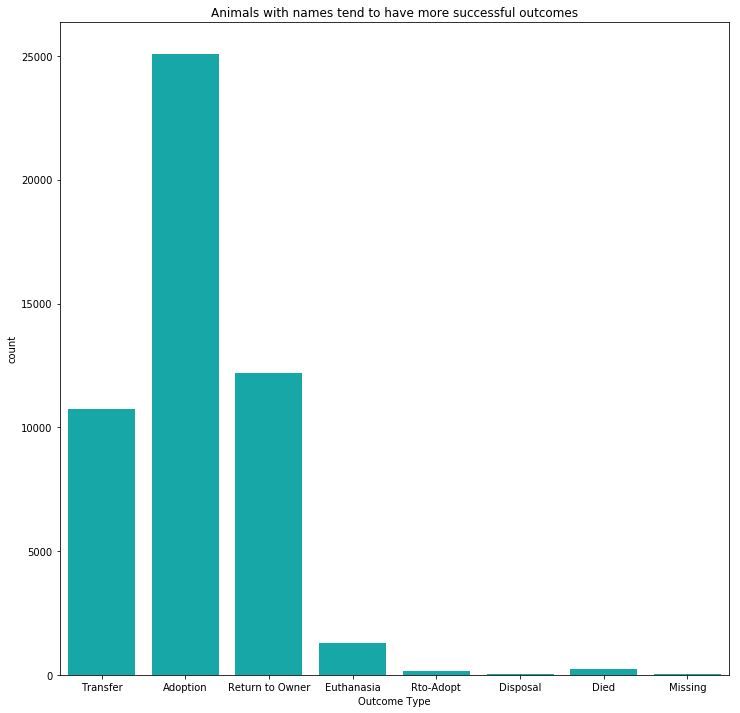

In [17]:
# Give every animal a name!

mask = animals_graphing[(animals_graphing["has_name"] == 1)]

plt.figure(figsize=(12, 12))
plt.title("Animals with names tend to have more successful outcomes")
sns.countplot(x = "Outcome Type", data = mask, color = "c")

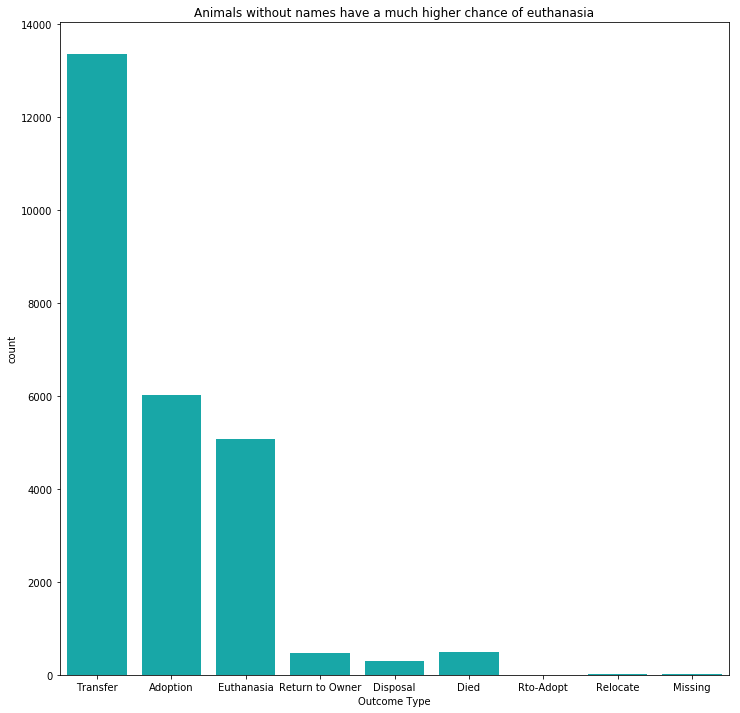

In [18]:
# Give every animal a name!

mask = animals_graphing[(animals_graphing["has_name"] == 0)]

plt.figure(figsize=(12, 12))
plt.title("Animals without names have a much higher chance of euthanasia")
sns.countplot(x = "Outcome Type", data = mask, color = "c")

***Animal Type***

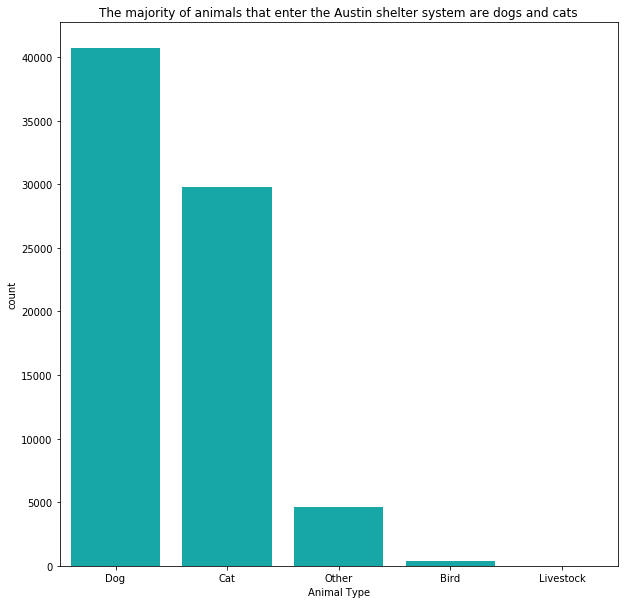

In [19]:
# Count of animal type

plt.figure(figsize=(10, 10))
plt.title("The majority of animals that enter the Austin shelter system are dogs and cats")
sns.countplot(x = "Animal Type", data = animals_graphing, color = "c")

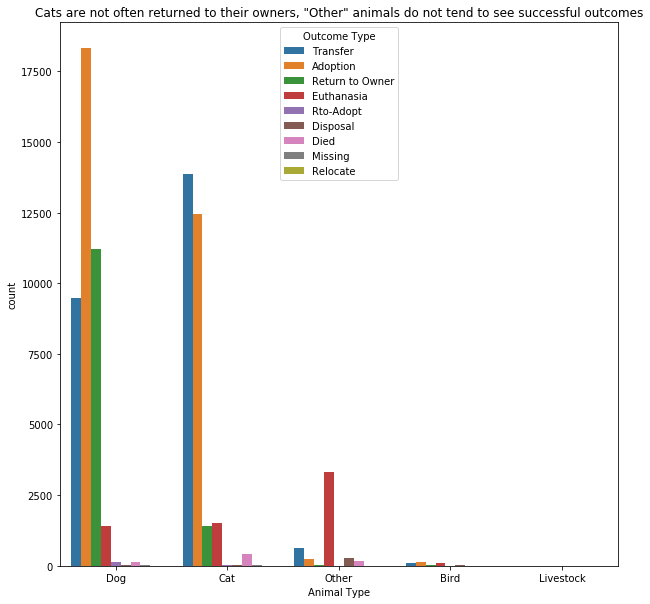

In [20]:
# Outcomes for different animal types

plt.figure(figsize=(10, 10))
plt.title('Cats are not often returned to their owners, "Other" animals do not tend to see successful outcomes')
sns.countplot(x = "Animal Type", hue= "Outcome Type", data = animals_graphing)

***Sex upon Outcome***

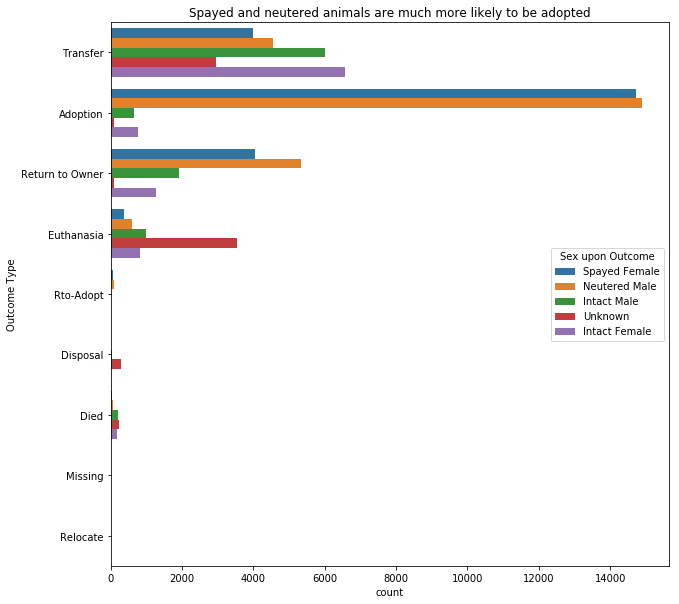

In [21]:
# Plot outcome based on sex

plt.figure(figsize=(10, 10))
plt.title("Spayed and neutered animals are much more likely to be adopted")
sns.countplot(y = "Outcome Type", data = animals_graphing, hue = "Sex upon Outcome")

***Intake/Outcome Time, Adoption vs. Euthanasia***

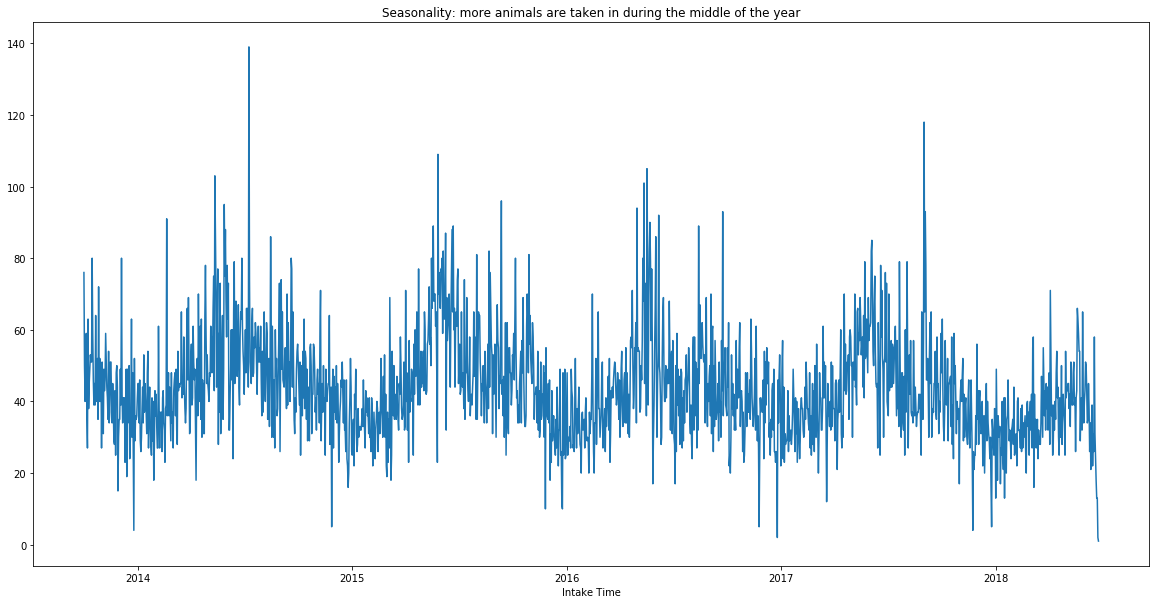

In [22]:
# Intake time

plt.figure(figsize=(20, 10))
plt.title("Seasonality: more animals are taken in during the middle of the year")
animals_graphing["Intake Condition"].groupby(animals_graphing["Intake Time"]).count().plot(kind="line")

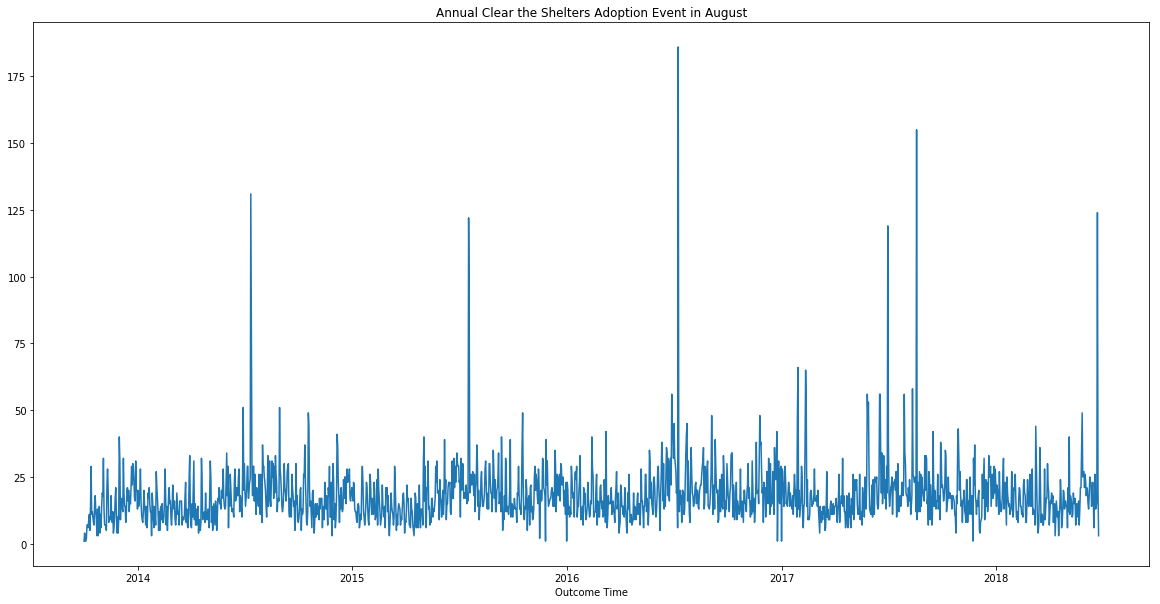

In [23]:
# Adoptions

mask = animals_graphing[animals_graphing["Outcome Type"] == "Adoption"]

plt.figure(figsize=(20, 10))
plt.title("Annual Clear the Shelters Adoption Event in August")
mask["Outcome Type"].groupby(mask["Outcome Time"]).count().plot(kind="line")

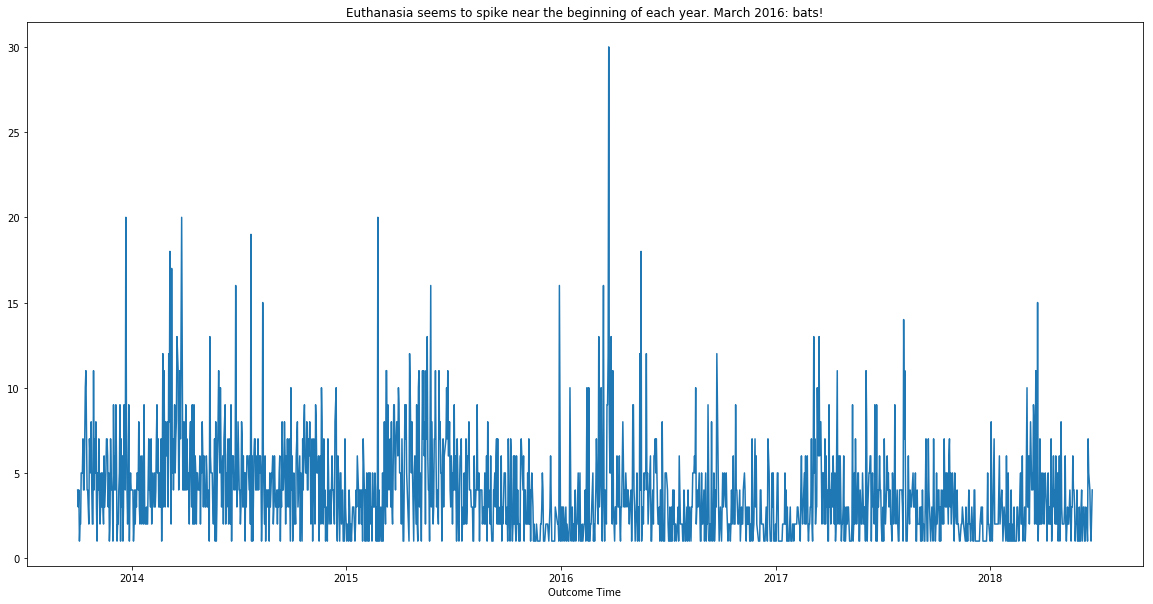

In [24]:
# Euthanasia

mask = animals_graphing[animals_graphing["Outcome Type"] == "Euthanasia"]

animals_graphing["Outcome Time"] = animals_graphing["Outcome Time"]

plt.figure(figsize=(20, 10))
plt.title("Euthanasia seems to spike near the beginning of each year. March 2016: bats!")
mask["Outcome Type"].groupby(mask["Outcome Time"]).count().plot(kind="line")

In [25]:
# Trying to explain spike in early 2016: much higher intake of wildlife, mainly bats

for i in range(1, 5):

    mask = animals_graphing[(animals_graphing["Outcome Type"] == "Euthanasia") &
                            (animals_graphing["Outcome Year"] == 2016) & 
                            (animals_graphing["Outcome Month"] == i)]
    
    print("2016 Month ", i)
    print(mask["Intake Type"].value_counts())
    print(" ")

2016 Month  1
Wildlife              33
Stray                 24
Euthanasia Request     3
Owner Surrender        3
Name: Intake Type, dtype: int64
 
2016 Month  2
Wildlife              42
Stray                 20
Euthanasia Request     3
Owner Surrender        3
Name: Intake Type, dtype: int64
 
2016 Month  3
Wildlife              149
Stray                  28
Owner Surrender        13
Public Assist          11
Euthanasia Request      2
Name: Intake Type, dtype: int64
 
2016 Month  4
Wildlife           50
Stray              31
Owner Surrender     5
Public Assist       4
Name: Intake Type, dtype: int64
 
